In [1]:
import sys
!{sys.executable} -m pip install toml
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: /opt/software/linux-amzn2-x86_64_v3/gcc-7.3.1/python-3.9.12-4vuiofuuhjzwokx3xdnqitrp4z22gymb/bin/python3.9 -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 6.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 7.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 9.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 9.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 13.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: /opt/software/linux-amzn2-x86_64_v3/gcc-7.3.1/python-3.9.12-4vuiofuuhjzwokx3xdn

In [2]:
!{sys.executable} perf_pipeline.py opflow_testsuite_cloud.toml

Auto Profiler Log ======> For testcase 1
Auto Profiler Log ======> With no tool Total Iterations: 1, CPU Average time per testcase: 0.83784 seconds, std: 0.0
Auto Profiler Log ======> PETSc reported Solve Time per testcase: 0.63401 seconds
Auto Profiler Log ======> Total HIOP iterations: 10, Average time per HIOP iteration: 0.08378 seconds
Auto Profiler Log ======> PETSc reported Solve time per iteration: 0.0634
Auto Profiler Log ======> For testcase 2
Auto Profiler Log ======> With no tool Total Iterations: 1, CPU Average time per testcase: 0.98797 seconds, std: 0.0
Auto Profiler Log ======> PETSc reported Solve Time per testcase: 0.92159 seconds
Auto Profiler Log ======> Total HIOP iterations: 15, Average time per HIOP iteration: 0.06586 seconds
Auto Profiler Log ======> PETSc reported Solve time per iteration: 0.06144
Auto Profiler Log ======> For testcase 3
Auto Profiler Log ======> With no tool Total Iterations: 1, CPU Average time per testcase: 1.36512 seconds, std: 0.0
Auto Prof

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import json
def visualizeProfiledData(in_file):
    profiledData = json.load(open(in_file, 'r'))
    ## BAR GRAPH ##
    xAxis = []
    hiop_values = []
    ipopt_values = []
    xGroups = ['HIOP', 'IPOPT']
    for e_data in profiledData:
        if e_data['opflow_solver'] == 'HIOP':
            hiop_values.append(e_data['petsc_solve_time'])
            xAxis.append(e_data['max_iter'])
        else:
            ipopt_values.append(e_data['petsc_solve_time'])

    df = pd.DataFrame({xGroups[0]: hiop_values,
                    xGroups[1]: ipopt_values}, index=xAxis)
    ax = df.plot.bar(rot=0, color={xGroups[0]: "green", xGroups[1]: "red"})
    plt.xlabel('Iterations')
    plt.ylabel('Solve Time (s)')
    plt.show()

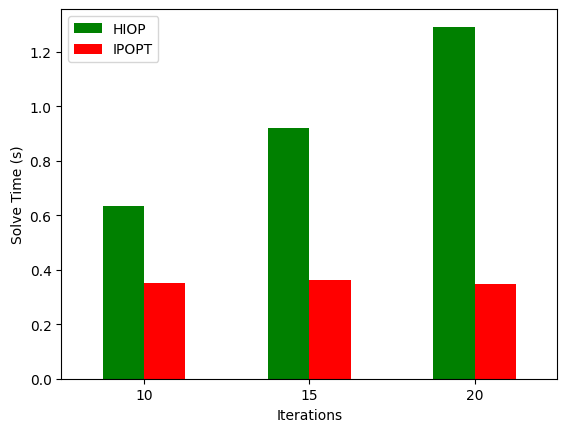

In [4]:
in_file = "OPFLOW_cloud_profiling.json"
visualizeProfiledData(in_file)